# Gradient Boosting Example Using Titanic Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
happy_planet=pd.read_excel('hpi-data-2016.xlsx',sheet_name=4)
happy_planet=happy_planet[0:140]
del happy_planet['Unnamed: 0']
happy_planet=happy_planet.sort_values(by=['HPI Rank'])
happy_planet.head()

med = np.median(happy_planet['Happy Planet Index'])

upper = happy_planet.loc[happy_planet['Happy Planet Index']>=med]
lower = happy_planet.loc[happy_planet['Happy Planet Index']<med]

#Evaluation for using median
#Compare to random forest - time taken, complexity
#Extra layer of decision trees

happy_planet

,HPI Rank,Country,Region,Average Life \nExpectancy,Average Wellbeing\n(0-10),Happy Life Years,Footprint\n(gha/capita),Inequality of Outcomes,Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index,GDP/capita\n($PPP),Population,GINI index
28,1.0,Costa Rica,Americas,79.076,7.300000,48.174792,2.84000,0.145568,72.615551,6.792280,44.714071,9733.396931,4654148.0,48.61
79,2.0,Mexico,Americas,76.411,7.300000,44.262083,2.89000,0.187699,66.311965,6.832881,40.697292,9703.371017,122070963.0,48.07
26,3.0,Colombia,Americas,73.673,6.400000,35.070893,1.87000,0.235044,63.100669,5.715982,40.695011,7885.061292,46881018.0,53.54
134,4.0,Vanuatu,Asia Pacific,71.341,6.470000,34.895752,1.86262,0.223332,60.321329,5.943032,40.570099,3158.420974,247498.0,Data unavailable
136,5.0,Vietnam,Asia Pacific,75.477,5.500000,32.770246,1.65000,0.185921,64.794265,5.215639,40.307589,1754.547974,88809200.0,38.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,136.0,Mongolia,Asia Pacific,68.570,4.900000,25.339305,6.08000,0.219086,56.870233,4.613691,14.269471,4377.238870,2808339.0,33.75
11,137.0,Benin,Sub Saharan Africa,59.167,3.200000,9.935781,1.41000,0.444113,37.269799,2.823961,13.422365,807.688451,10049792.0,Data unavailable
123,138.0,Togo,Sub Saharan Africa,58.601,2.866667,8.970005,1.13000,0.428742,39.639758,2.420936,13.233269,580.495062,6745581.0,Data unavailable
72,139.0,Luxembourg,Europe,81.111,7.000000,51.677888,15.82000,0.067837,78.970294,6.702020,13.151174,105447.093241,530946.0,34.79


In [3]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
y_train = train_data["Survived"]
train_data.drop(labels="Survived", axis=1, inplace=True)
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Concatenate dataset
full_data = train_data.append(test_data)
full_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#Drop columns not necessary for training
drop_columns = ['Name', 'Age', 'SibSp', 'Ticket', 'Cabin', 'Parch', 'Embarked']
full_data.drop(labels=drop_columns, axis=1, inplace=True)
full_data


,PassengerId,Pclass,Sex,Fare
0,1,3,male,7.2500
1,2,1,female,71.2833
2,3,3,female,7.9250
3,4,1,female,53.1000
4,5,3,male,8.0500
...,...,...,...,...
413,1305,3,male,8.0500
414,1306,1,female,108.9000
415,1307,3,male,7.2500
416,1308,3,male,8.0500


In [6]:

full_data = pd.get_dummies(full_data, columns=["Sex"])
full_data.fillna(value=0.0, inplace=True)
full_data

,PassengerId,Pclass,Fare,Sex_female,Sex_male
0,1,3,7.2500,0,1
1,2,1,71.2833,1,0
2,3,3,7.9250,1,0
3,4,1,53.1000,1,0
4,5,3,8.0500,0,1
...,...,...,...,...,...
413,1305,3,8.0500,0,1
414,1306,1,108.9000,1,0
415,1307,3,7.2500,0,1
416,1308,3,8.0500,0,1


In [7]:
#Split data into training and test sets
X_train = full_data.values[0:891]
X_test = full_data.values[891:]
X_train

array([[  1.    ,   3.    ,   7.25  ,   0.    ,   1.    ],
       [  2.    ,   1.    ,  71.2833,   1.    ,   0.    ],
       [  3.    ,   3.    ,   7.925 ,   1.    ,   0.    ],
       ...,
       [889.    ,   3.    ,  23.45  ,   1.    ,   0.    ],
       [890.    ,   1.    ,  30.    ,   0.    ,   1.    ],
       [891.    ,   3.    ,   7.75  ,   0.    ,   1.    ]])

In [8]:
#Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.        , 1.        , 0.01415106, 0.        , 1.        ],
       [0.0011236 , 0.        , 0.13913574, 1.        , 0.        ],
       [0.00224719, 1.        , 0.01546857, 1.        , 0.        ],
       ...,
       [0.99775281, 1.        , 0.04577135, 1.        , 0.        ],
       [0.9988764 , 0.        , 0.0585561 , 0.        , 1.        ],
       [1.        , 1.        , 0.01512699, 0.        , 1.        ]])

In [9]:
#Set a seed and select the percentage of data for testing on
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)
y_val

456    0
351    0
173    0
671    0
836    0
      ..
860    0
69     0
647    1
872    0
669    1
Name: Survived, Length: 268, dtype: int64

In [10]:
#Set different learning rates to compare performance of classifier at different rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.801
Accuracy score (validation): 0.731
Learning rate:  0.075
Accuracy score (training): 0.814
Accuracy score (validation): 0.731
Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.724
Learning rate:  0.25
Accuracy score (training): 0.835
Accuracy score (validation): 0.750
Learning rate:  0.5
Accuracy score (training): 0.864
Accuracy score (validation): 0.772
Learning rate:  0.75
Accuracy score (training): 0.875
Accuracy score (validation): 0.754
Learning rate:  1
Accuracy score (training): 0.875
Accuracy score (validation): 0.739


In [11]:
#Evaluate the classifier by checking its accuracy and creating a confusion matrix
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[142  19]
 [ 42  65]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       161
           1       0.77      0.61      0.68       107

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268



In [12]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_val, clf.predict(X_val))
print("MSE: %.4f" % mse)

MSE: 0.1708


Text(0,0.5,'Deviance')

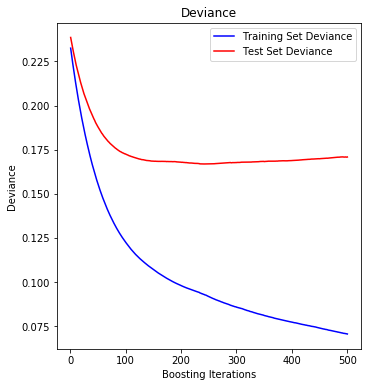

In [13]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_val)):
    test_score[i] = clf.loss_(y_val, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

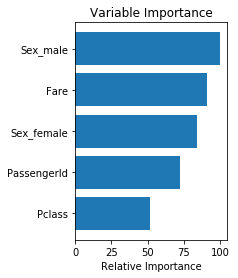

In [14]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
features=full_data.columns
plt.yticks(pos, features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()